In [1]:
import gzip
import pickle
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:

from matplotlib.colors import LogNorm
fontsize = 18
def hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    plt.figure(figsize=(8, 6))
    #bins = np.linspace(0, max(np.max(x1),np.max(x2)), 50) if predefined_bins else 'auto'
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    errors1 = np.sqrt(n1)
    if not density: plt.errorbar(bin_centers, n1, yerr=errors1, color='orange',fmt='none')
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    errors2 = np.sqrt(n2)
    if not density: plt.errorbar(bin_centers, n2, yerr=errors2, color='blue',fmt='none')
    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

def hist2d(x, x_fs, W = None, W_fs = None, fontsize=12):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True, sharex=True)
    fig.tight_layout()

    # First histogram (Enriched Sample)
    h1, xedges, yedges, im1 = axes[0].hist2d(*x, bins=50, cmap='viridis', norm=LogNorm(), density=False, weights=W)
    axes[0].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[0].set_ylabel('$P_t$ [GeV]', fontsize=fontsize)
    axes[0].set_title('Enriched Sample', fontsize=fontsize)
    cbar1 = fig.colorbar(im1, ax=axes[0], label='Density')

    # Second histogram (Full Sample)
    h2, _, _, im2 = axes[1].hist2d(*x_fs, bins=[xedges, yedges], cmap='viridis', norm=LogNorm(), density=False, weights=W_fs)
    axes[1].set_xlabel('$|P|$ [GeV]', fontsize=fontsize)
    axes[1].set_title('Full Sample', fontsize=fontsize)
    cbar2 = fig.colorbar(im2, ax=axes[1], label='Density')

    # Adjust tick parameters
    for ax in axes:
        ax.tick_params(axis='both', which='major', labelsize=fontsize)
        ax.tick_params(axis='both', which='minor', labelsize=fontsize)

    plt.show()

def difference_hist1d(x1,x2,xlabel:str = '',density = True, bins = 'auto'):
    n1, bins, patches = plt.hist(x1, bins=bins, density=density, histtype='step', label='Independent Geant4', color='orange', linewidth=2.5)
    bin_centers = 0.5 * (bins[1:] + bins[:-1])
    n2, _, _ = plt.hist(x2, bins=bins, density=density, histtype='step', label='FairShip', color='blue')
    diff = n1-n2
    plt.close()
    bin_centers = 0.5 * (bins[:-1] + bins[1:])  # Calculate bin centers for plotting

    plt.figure(figsize=(8, 6))
    plt.bar(bin_centers, diff, width=np.diff(bins), color='blue', edgecolor='black', alpha=0.7)

    plt.xlabel(xlabel,fontsize=fontsize)
    plt.legend(fontsize=fontsize)
    plt.tight_layout()
    plt.tick_params(axis='both', which='major', labelsize=fontsize)  # Major ticks
    plt.tick_params(axis='both', which='minor', labelsize=fontsize)  # Minor ticks (if needed)


In [3]:
with gzip.open('subsample_biased.pkl', 'rb') as f:
    data = pickle.load(f)
print(data.shape)

#with gzip.open('inputs.pkl', 'rb') as f:
#    data_old = pickle.load(f)
data_full = []
for file_name in os.listdir('../full_sample'):
    print(file_name)
    with gzip.open(f'../full_sample/{file_name}', 'rb') as f:
        data_full.append(pickle.load(f))
data_full = np.concatenate(data_full)
print(data_full.shape)

(5000000, 8)
full_sample_44000.pkl
full_sample_0.pkl
full_sample_57000.pkl
full_sample_41000.pkl
full_sample_48000.pkl
full_sample_37000.pkl
full_sample_32000.pkl
full_sample_60000.pkl
full_sample_12000.pkl
full_sample_55000.pkl
full_sample_39000.pkl
full_sample_6000.pkl
full_sample_17000.pkl
full_sample_25000.pkl
full_sample_38000.pkl
full_sample_28000.pkl
full_sample_46000.pkl
full_sample_27000.pkl
full_sample_35000.pkl
full_sample_65000.pkl
full_sample_43000.pkl
full_sample_52000.pkl
full_sample_36000.pkl
full_sample_64000.pkl
full_sample_2000.pkl
full_sample_34000.pkl
full_sample_40000.pkl
full_sample_26000.pkl
full_sample_33000.pkl
full_sample_3000.pkl
full_sample_47000.pkl
full_sample_45000.pkl
full_sample_14000.pkl
full_sample_53000.pkl
full_sample_62000.pkl
full_sample_9000.pkl
full_sample_13000.pkl
full_sample_21000.pkl
full_sample_59000.pkl
full_sample_4000.pkl
full_sample_50000.pkl
full_sample_63000.pkl
full_sample_18000.pkl
full_sample_58000.pkl
full_sample_10000.pkl
full_s

In [4]:
px,py,pz,x,y,z,pdg,W = data.T
pt = np.sqrt(px**2+py**2)
p = np.sqrt(px**2+py**2+pz**2)

#px_old,py_old,pz_old,x_old,y_old,z_old,pdg_old= data_old.T
#pt_old = np.sqrt(px_old**2+py_old**2)
#p_old = np.sqrt(px_old**2+py_old**2+pz_old**2)

px_full,py_full,pz_full,x_full,y_full,z_full,pdg_full, W_full= data_full.T
pt_full = np.sqrt(px_full**2+py_full**2)
p_full = np.sqrt(px_full**2+py_full**2+pz_full**2)

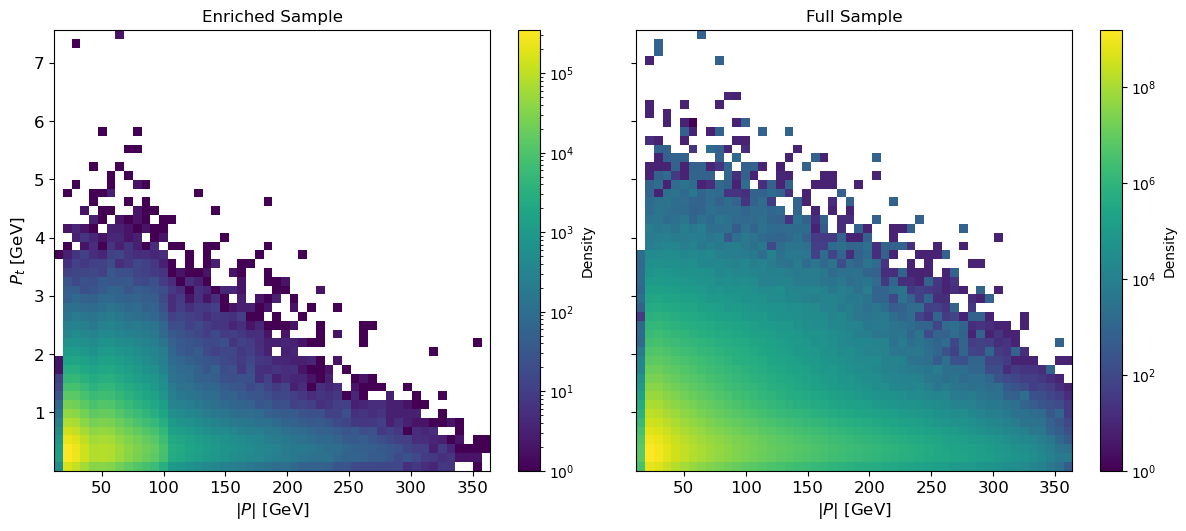

In [5]:
hist2d((p,pt),(p_full,pt_full), W=W, W_fs=W_full)

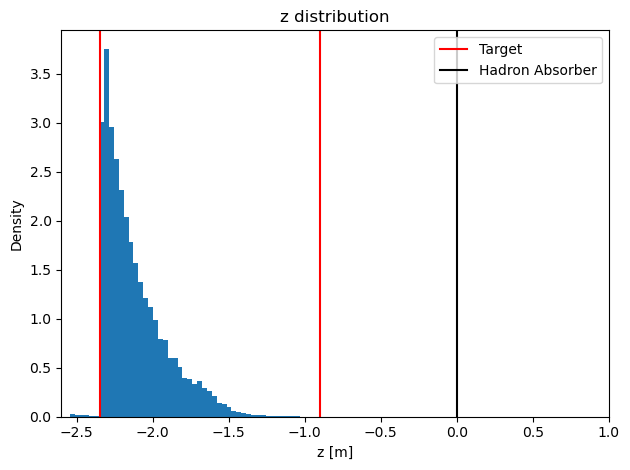

In [6]:
plt.hist(z_full, bins=200, density=True)
plt.title('z distribution')
plt.axvline(-2.345, color='red', label='Target')
plt.axvline(-0.9, color='red')
plt.axvline(0.0, color='black', label = 'Hadron Absorber')
plt.xlabel('z [m]')
plt.ylabel('Density')

plt.xlim(-2.6, 1)
plt.tight_layout()
plt.legend()
plt.show()

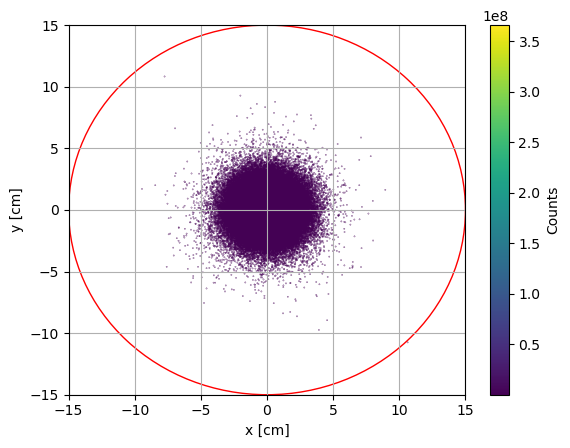

Total number of particles outside the cylinder: 1  (out of 506297015)
Total number of WEIGHTED particles outside the cylinder: 768.75  (out of 17997956153.801212)
Particles that already start after the target: 2575  (out of 506374000)


In [7]:
#plt.scatter(x*100,y*100, alpha = 0.1)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.hexbin(x_full[z_full<-0.9]*100, y_full[z_full<-0.9]*100, gridsize=1000, cmap='viridis', mincnt=1)
circ = plt.Circle((0, 0), 15, color='r', fill=False)
plt.gca().add_patch(circ)
plt.colorbar(label='Counts')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.show()

print('Total number of particles outside the cylinder:', np.sum(np.sqrt(x_full[z_full<-0.9]**2 + y_full[z_full<-0.9]**2)>0.15), f' (out of {data_full[z_full<-0.9].shape[0]})')
print('Total number of WEIGHTED particles outside the cylinder:', np.sum(data_full[:,-1][z_full<-0.9][np.sqrt(x_full[z_full<-0.9]**2 + y_full[z_full<-0.9]**2)>0.15]), f' (out of {data_full[:,-1][z_full<-0.9].sum()})')
print('Particles that already start after the target:', np.sum(z_full>0.9), f' (out of {data_full.shape[0]})')

In [8]:
SmearBeam = 5
if SmearBeam > 0:
    gauss = np.random.normal(0, 1, size=x.shape)  # mean 0, stddev 1, same size as x
    uniform = np.random.uniform(0, 2, size=x.shape)

    r = SmearBeam + 0.8 * gauss
    _phi = uniform * np.pi
    dx = r * np.cos(_phi)
    dy = r * np.sin(_phi)

x += dx / 100
y += dy / 100


if SmearBeam > 0:
    gauss = np.random.normal(0, 1, size=x_full.shape)  # mean 0, stddev 1, same size as x
    uniform = np.random.uniform(0, 2, size=x_full.shape)

    r = SmearBeam + 0.8 * gauss
    _phi = uniform * np.pi
    dx = r * np.cos(_phi)
    dy = r * np.sin(_phi)
x_full += dx / 100
y_full += dy / 100


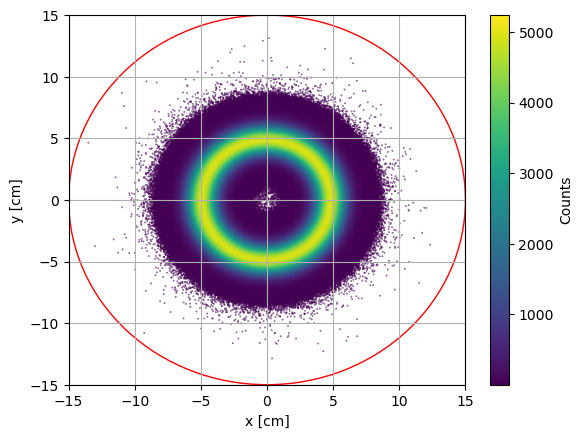

Total number of particles outside the cylinder: 1  (out of 506297015)
Total number of WEIGHTED particles outside the cylinder: 7.6875  (out of 17997956153.801212)


In [9]:
#plt.scatter(x*100,y*100, alpha = 0.1)
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.hexbin(x_full[z_full<-0.9]*100, y_full[z_full<-0.9]*100, gridsize=1000, cmap='viridis', mincnt=1)
circ = plt.Circle((0, 0), 15, color='r', fill=False)
plt.gca().add_patch(circ)
plt.colorbar(label='Counts')
plt.xlabel('x [cm]')
plt.ylabel('y [cm]')
plt.grid()
plt.show()

print('Total number of particles outside the cylinder:', np.sum(np.sqrt(x_full[z_full<-0.9]**2 + y_full[z_full<-0.9]**2)>0.15), f' (out of {data_full[z_full<-0.9].shape[0]})')
print('Total number of WEIGHTED particles outside the cylinder:', np.sum(data_full[:,-1][z_full<-0.9][np.sqrt(x_full[z_full<-0.9]**2 + y_full[z_full<-0.9]**2)>0.15]), f' (out of {data_full[:,-1][z_full<-0.9].sum()})')

In [10]:
def propagate_free_muons(dist,px,py,pz,x,y,z, epsilon = 1e-12):
    znew = z + dist
    x_new = x + dist*px/(pz+epsilon)
    y_new = y + dist*py/(pz+epsilon)
    return x_new,y_new
final_z= -2.345+0.9
dist = final_z - z_full
x_propagated, y_propagated = propagate_free_muons(dist,px_full,py_full,pz_full,x_full,y_full,z_full)

Total number of particles outside the cylinder: 2079  (out of 506297015)
Total number of WEIGHTED particles outside the cylinder: 350125.2801513672  (out of 17997956153.801212)


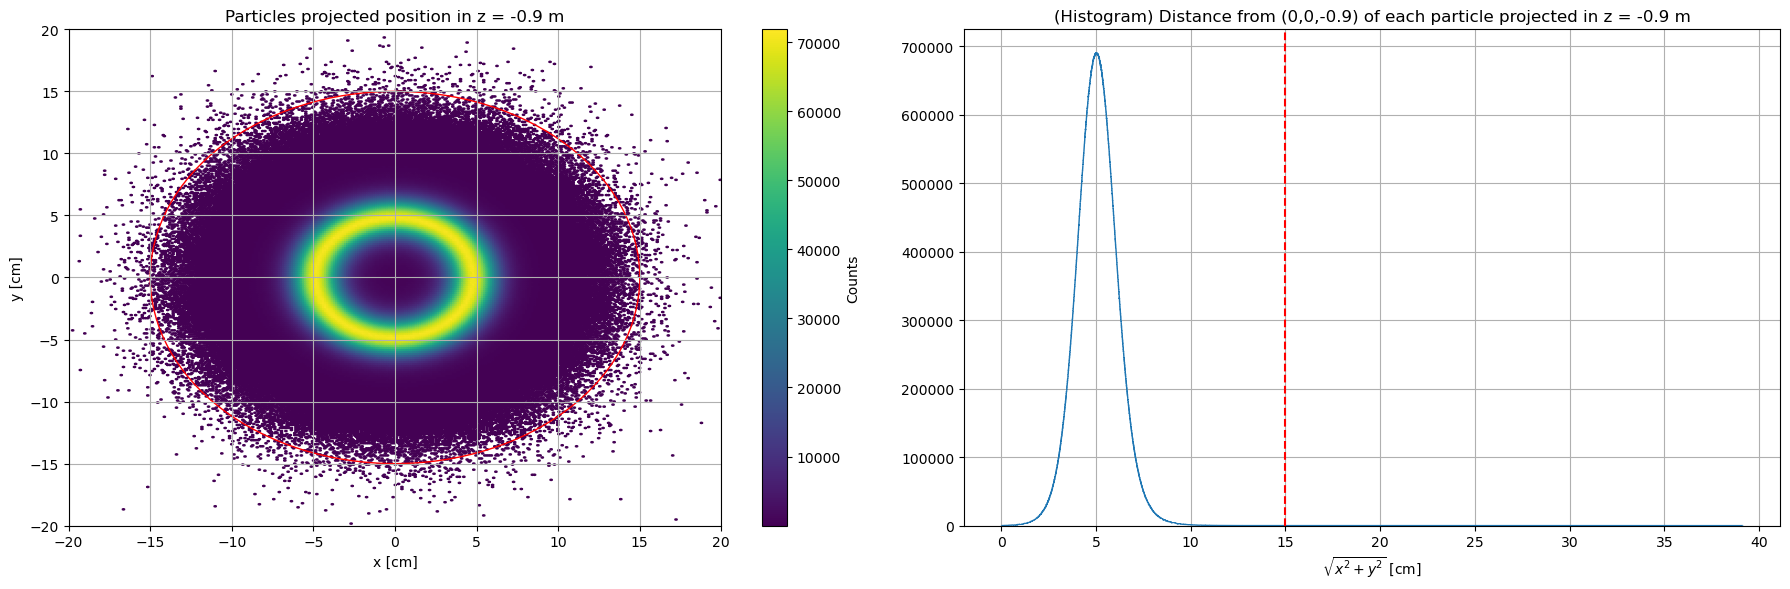

In [11]:
print('Total number of particles outside the cylinder:', np.sum(np.sqrt(x_propagated[z_full<-0.9]**2 + y_propagated[z_full<-0.9]**2)>0.15), f' (out of {data_full[z_full<-0.9].shape[0]})')
print('Total number of WEIGHTED particles outside the cylinder:', np.sum(data_full[:,-1][z_full<-0.9][np.sqrt(x_propagated[z_full<-0.9]**2 + y_propagated[z_full<-0.9]**2)>0.15]), f' (out of {data_full[:,-1][z_full<-0.9].sum()})')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# First subplot
axes[0].set_xlim(-20, 20)
axes[0].set_ylim(-20, 20)
hb = axes[0].hexbin(x_propagated[z_full<-0.9]*100, y_propagated[z_full<-0.9]*100, gridsize=500, cmap='viridis', mincnt=1)
circ = plt.Circle((0, 0), 15, color='r', fill=False)
axes[0].add_patch(circ)
fig.colorbar(hb, ax=axes[0], label='Counts')
axes[0].set_xlabel('x [cm]')
axes[0].set_ylabel('y [cm]')
axes[0].set_title("Particles projected position in z = -0.9 m")
axes[0].grid()

# Second subplot
axes[1].hist(np.sqrt(x_propagated[z_full<-0.9]**2 + y_propagated[z_full<-0.9]**2)*100, bins='auto', histtype='step')
axes[1].axvline(15, color='r', linestyle='--')
axes[1].set_xlabel(r'$\sqrt{x^2 + y^2}$ [cm]')
axes[1].set_title('(Histogram) Distance from (0,0,-0.9) of each particle projected in z = -0.9 m')
axes[1].grid()

plt.tight_layout()
plt.show()

weight -0.0 : 39
Total: -0.0
weight 0.09369999915361404 : 3311
Total: 310.2406971976161
weight 1.0 : 20993
Total: 20993.0
weight 3.2616000175476074 : 691113
Total: 2254134.1729273796
weight 7.6875 : 480474935
Total: 3693651062.8125
weight 9.369999885559082 : 168445
Total: 1578329.6307229996
weight 326.1600036621094 : 11094133
Total: 3618462459.9079285
weight 768.75 : 13921031
Total: 10701792581.25


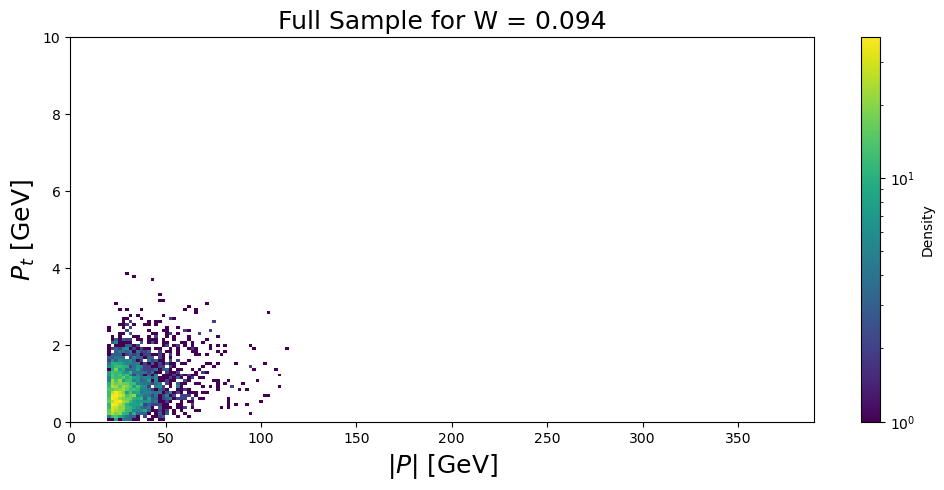

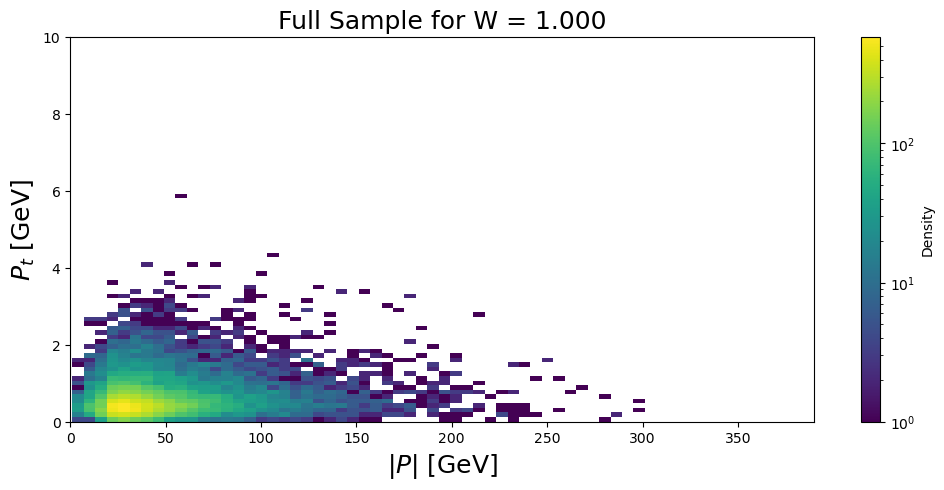

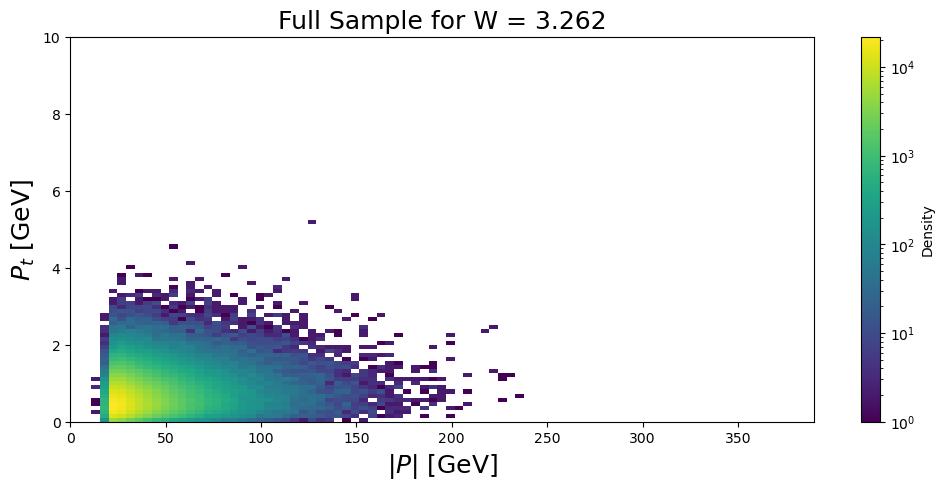

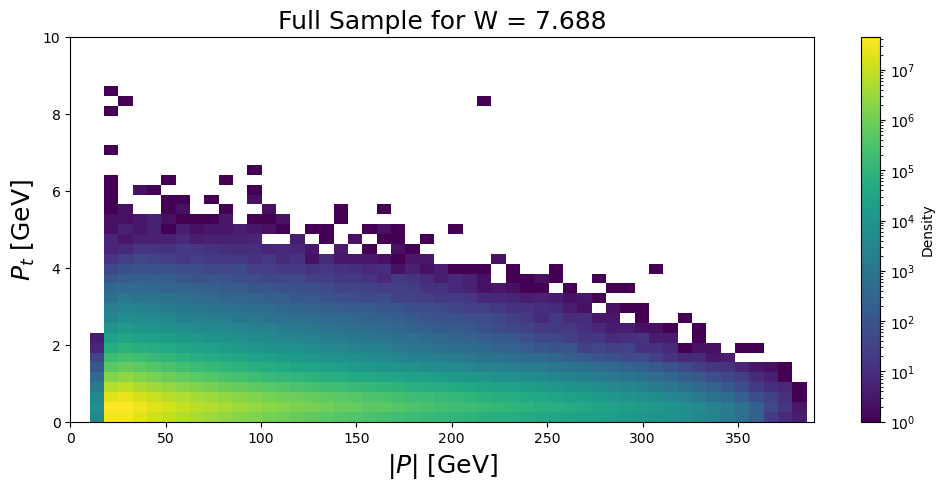

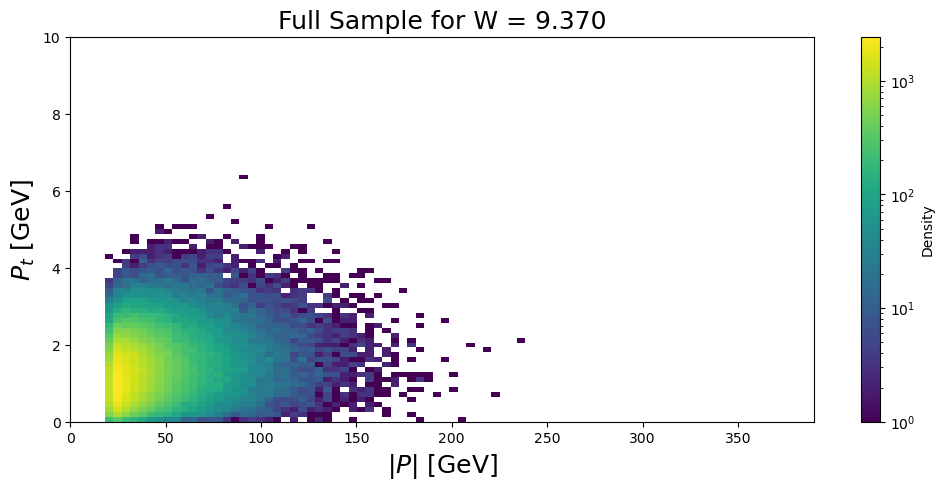

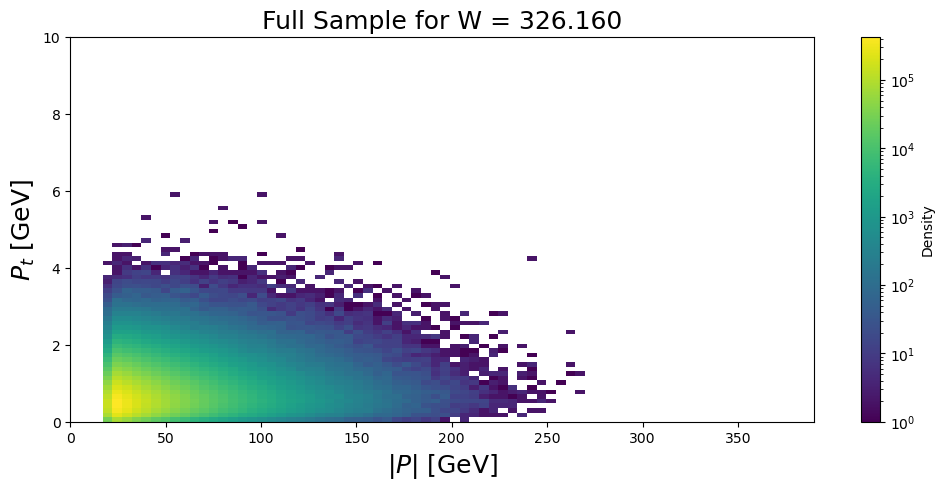

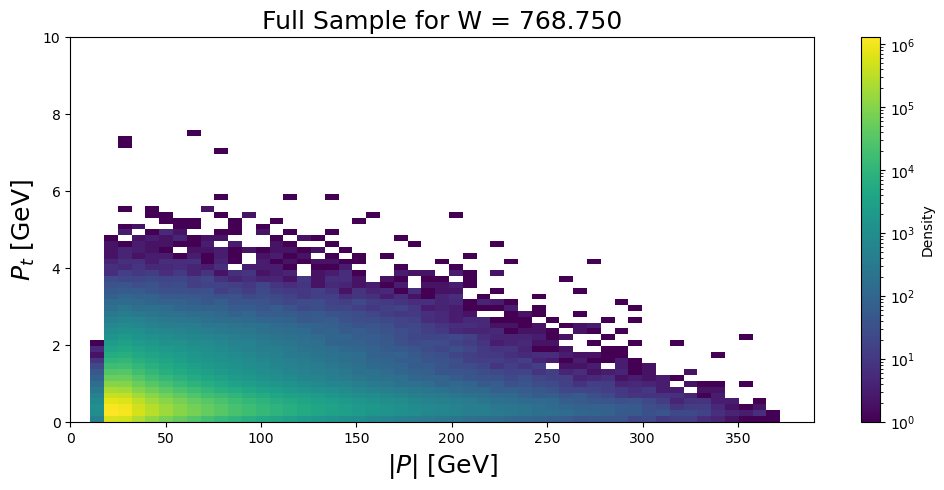

In [12]:
unique_W_full,n_w = np.unique(W_full,return_counts=True)
for w_val,n in zip(unique_W_full,n_w):
    print(f"weight {w_val} : {n}")
    print(f"Total: {w_val*n}")

for w_val in unique_W_full:
    if w_val < 0.001: continue
    mask = W_full == w_val
    plt.figure(figsize=(12, 5))
    plt.hist2d(p_full[mask], pt_full[mask], bins=50, cmap='viridis', norm=LogNorm(), density=False)
    plt.xlabel('$|P|$ [GeV]', fontsize=fontsize)
    plt.ylabel('$P_t$ [GeV]', fontsize=fontsize)
    plt.title(f'Full Sample for W = {w_val:.3f}', fontsize=fontsize)
    plt.colorbar(label='Density')
    plt.xlim(0, 390)
    plt.ylim(0,10)
    plt.show()


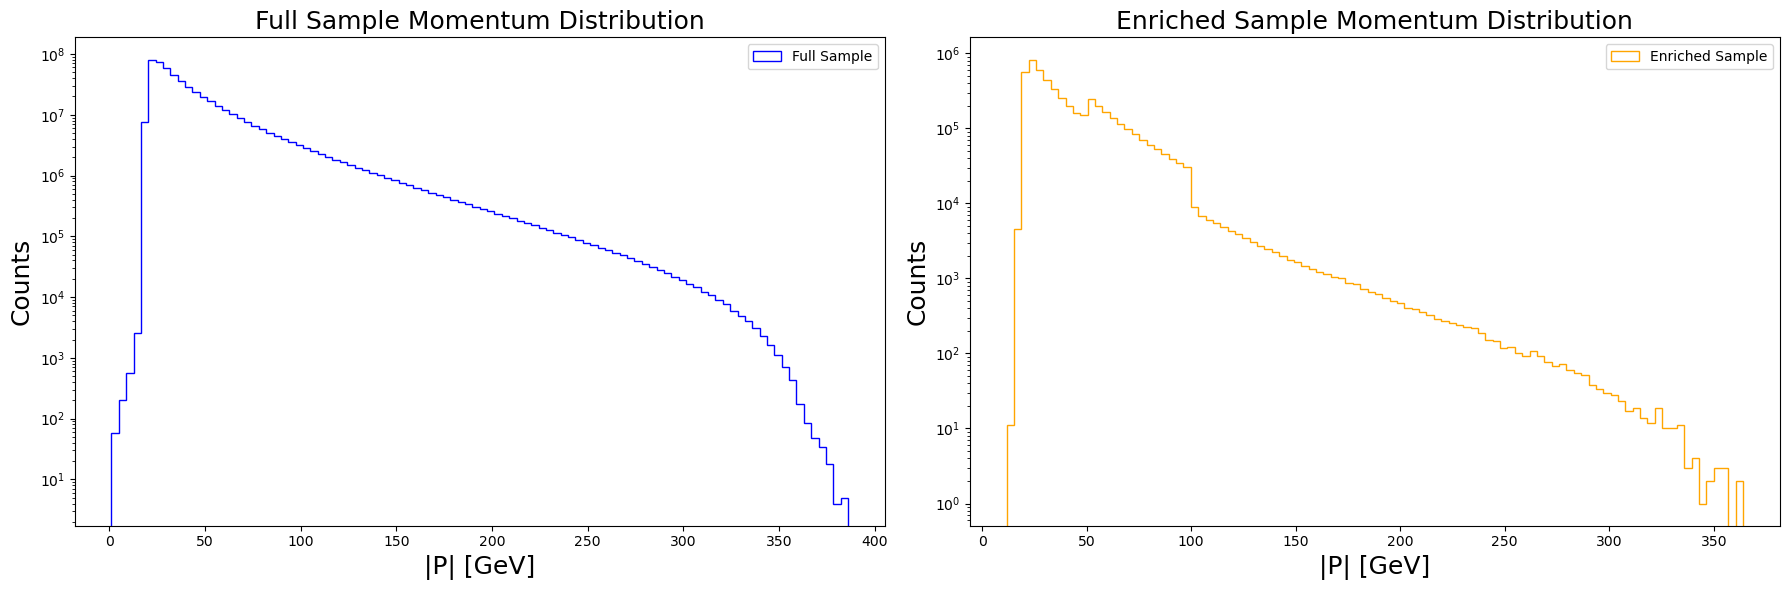

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Left plot for p_full
axes[0].hist(p_full, bins=100, label='Full Sample', color='blue', log=True, histtype='step')
axes[0].set_xlabel('|P| [GeV]', fontsize=fontsize)
axes[0].set_ylabel('Counts', fontsize=fontsize)
axes[0].set_title('Full Sample Momentum Distribution', fontsize=fontsize)
axes[0].legend()

# Right plot for p
axes[1].hist(p, bins=100, label='Enriched Sample', color='orange', log=True, histtype='step')
axes[1].set_xlabel('|P| [GeV]', fontsize=fontsize)
axes[1].set_ylabel('Counts', fontsize=fontsize)
axes[1].set_title('Enriched Sample Momentum Distribution', fontsize=fontsize)
axes[1].legend()

plt.tight_layout()
plt.show()

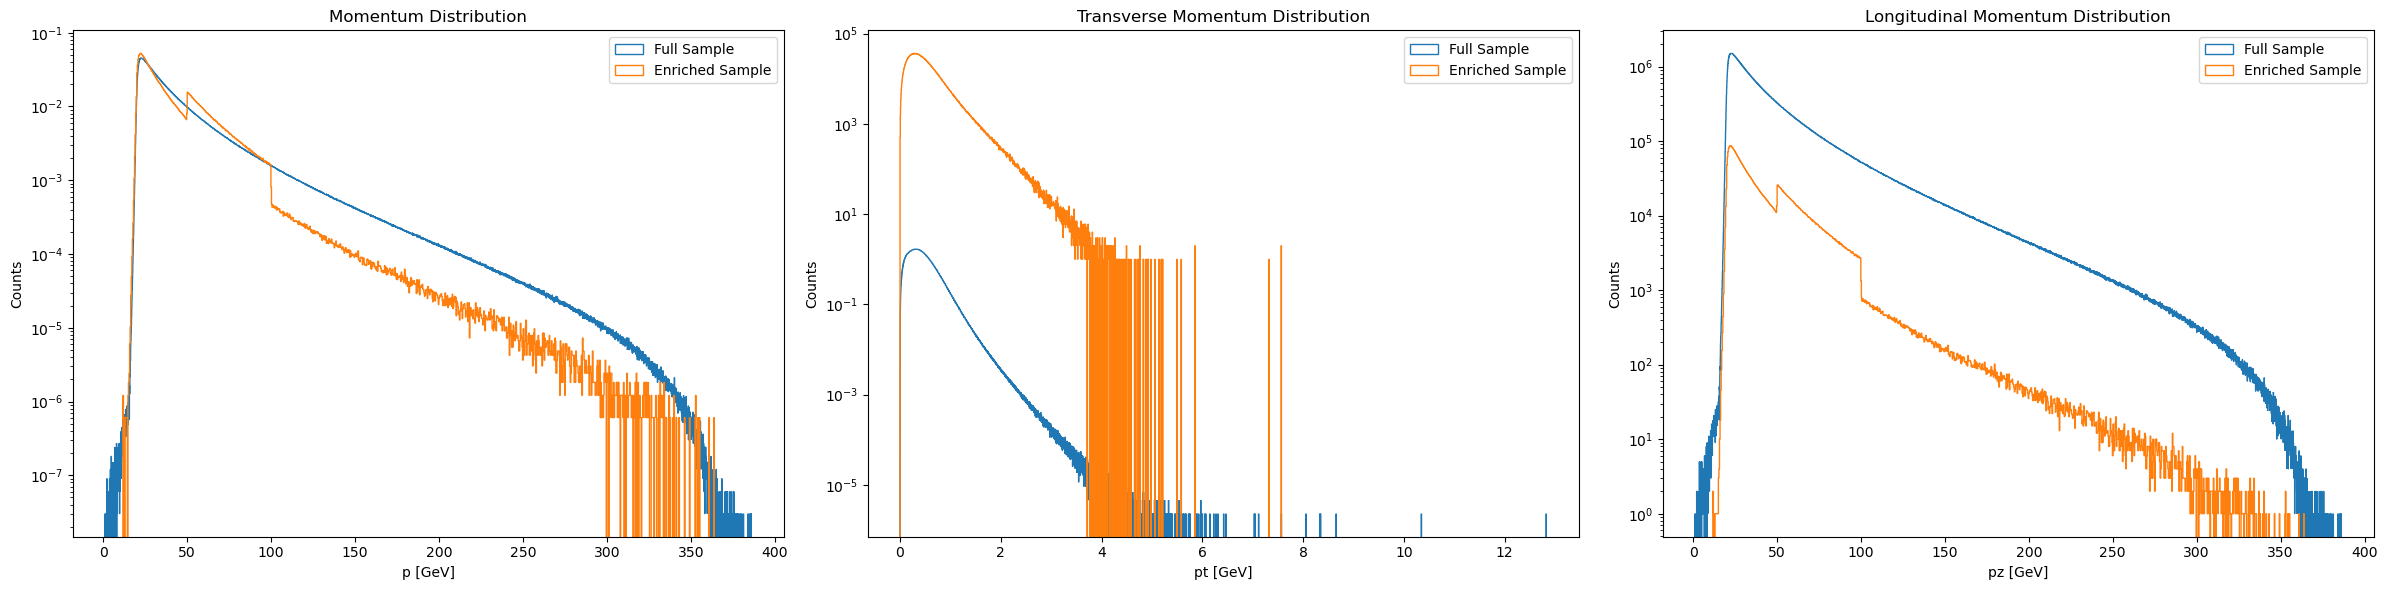

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# First subplot for p
axes[0].hist(p_full, bins='auto', histtype='step', label='Full Sample', density = True)
axes[0].hist(p, bins='auto', histtype='step', label='Enriched Sample', density = True)
axes[0].set_yscale('log')
axes[0].set_xlabel('p [GeV]')
axes[0].set_ylabel('Counts')
axes[0].legend()
axes[0].set_title('Momentum Distribution')

# Second subplot for pt
axes[1].hist(pt_full, bins='auto', histtype='step', label='Full Sample', density = True)
axes[1].hist(pt, bins='auto', histtype='step', label='Enriched Sample')
axes[1].set_yscale('log')
axes[1].set_xlabel('pt [GeV]')
axes[1].set_ylabel('Counts')
axes[1].legend()
axes[1].set_title('Transverse Momentum Distribution')

# Third subplot for pz
axes[2].hist(pz_full, bins='auto', histtype='step', label='Full Sample')
axes[2].hist(pz, bins='auto', histtype='step', label='Enriched Sample')
axes[2].set_yscale('log')
axes[2].set_xlabel('pz [GeV]')
axes[2].set_ylabel('Counts')
axes[2].legend()
axes[2].set_title('Longitudinal Momentum Distribution')

plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(24, 6))

# First subplot for p
axes[0].hist(px_full, bins='auto', histtype='step', label='Full Sample')
axes[0].hist(px, bins='auto', histtype='step', label='Enriched Sample')
axes[0].set_yscale('log')
axes[0].set_xlabel('px [GeV]')
axes[0].set_ylabel('Counts')
axes[0].legend()
axes[0].set_title('Momentum Distribution')

# Second subplot for pt
axes[1].hist(py_full, bins='auto', histtype='step', label='Full Sample')
axes[1].hist(py, bins='auto', histtype='step', label='Enriched Sample')
axes[1].set_yscale('log')
axes[1].set_xlabel('py [GeV]')
axes[1].set_ylabel('Counts')
axes[1].legend()
axes[1].set_title('Transverse Momentum Distribution')

# Third subplot for pz
axes[2].hist(pz_full, bins='auto', histtype='step', label='Full Sample')
axes[2].hist(pz, bins='auto', histtype='step', label='Enriched Sample')
axes[2].set_yscale('log')
axes[2].set_xlabel('pz [GeV]')
axes[2].set_ylabel('Counts')
axes[2].legend()
axes[2].set_title('Longitudinal Momentum Distribution')

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

# Calculate unique values and counts for W
unique_W, counts_W = np.unique(W, return_counts=True)
table_W = np.asarray((unique_W.round(2), counts_W)).T

# Calculate unique values and counts for W_full
unique_W_full, counts_W_full = np.unique(W_full, return_counts=True)
table_W_full = np.asarray((unique_W_full.round(2), counts_W_full)).T

# Create pandas DataFrames from the tables
df_W = pd.DataFrame(table_W, columns=['Unique Values', 'Counts'])
df_W_full = pd.DataFrame(table_W_full, columns=['Unique Values', 'Counts'])

# Calculate and print the total ratio of each unique value
df_W['Ratio'] = df_W['Counts'] / df_W['Counts'].sum()
df_W_full['Ratio'] = df_W_full['Counts'] / df_W_full['Counts'].sum()

print("Ratios for W:")
print(df_W[['Unique Values', 'Ratio']])

print("\nRatios for W_full:")
print(df_W_full[['Unique Values', 'Ratio']])

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for W
# Normalize the counts for W
df_W['Normalized Counts'] = df_W['Counts'] / df_W['Counts'].sum()
df_W.plot(x='Unique Values', y='Normalized Counts', kind='bar', ax=axes[0])
axes[0].set_xlabel('Unique Values')
axes[0].set_ylabel('Normalized Counts')
axes[0].set_title('Normalized Counts of Unique Values in W')

# Normalize the counts for W_full
df_W_full['Normalized Counts'] = df_W_full['Counts'] / df_W_full['Counts'].sum()
df_W_full.plot(x='Unique Values', y='Normalized Counts', kind='bar', ax=axes[1])
axes[1].set_xlabel('Unique Values')
axes[1].set_ylabel('Normalized Counts')
axes[1].set_title('Normalized Counts of Unique Values in W_full')

plt.tight_layout()
plt.show()

In [ ]:
#plt.hist(W_full, bins = 'auto', histtype='step', label= "Full Sample")
plt.hist(W, bins = 50, histtype='step', label = "Enriched Sample")
plt.show()
